In [5]:
import numpy as np


def calculate_energy(spins, J=1.0):
    horizontal_pairs = spins[:, :-1] * spins[:, 1:]
    vertical_pairs = spins[:-1, :] * spins[1:, :]
    return -J * (np.sum(horizontal_pairs) + np.sum(vertical_pairs))


example_spins = np.array([
    [ 1,  1, -1],
    [-1,  1,  1],
    [ 1, -1, -1]
])


energy = calculate_energy(example_spins)

print("Grid:\n", example_spins)
print(f"Calculated Energy: {energy}")

Grid:
 [[ 1  1 -1]
 [-1  1  1]
 [ 1 -1 -1]]
Calculated Energy: 4.0


Running simulation...


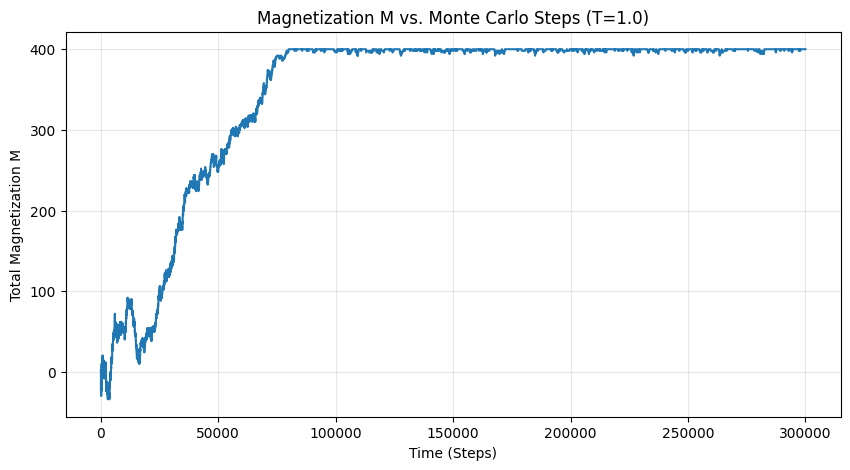

In [14]:
import matplotlib.pyplot as plt
np.random.seed(42)

def metropolis_simulation(steps=1000000, N=20, T=1.0, J=1.0):
    spins = np.random.choice([-1, 1], size=(N, N))
    
    M = np.sum(spins)
    magnetization_history = [M]
    
    for k in range(steps):
        i, j = np.random.randint(0, N, size=2)
        
        neighbor_sum = 0
        if i > 0: neighbor_sum += spins[i-1, j]    # Top
        if i < N-1: neighbor_sum += spins[i+1, j]  # Bottom
        if j > 0: neighbor_sum += spins[i, j-1]    # Left
        if j < N-1: neighbor_sum += spins[i, j+1]  # Right
        
        delta_E = 2 * J * spins[i, j] * neighbor_sum
        
        if delta_E <= 0:
            spins[i, j] *= -1
            M += 2 * spins[i, j] 
        elif np.random.random() < np.exp(-delta_E / T):
            spins[i, j] *= -1
            M += 2 * spins[i, j]
            
        magnetization_history.append(M)
            
    return magnetization_history, spins

print("Running simulation...")
mag_hist, final_grid = metropolis_simulation(steps=300000, T=1.0)

plt.figure(figsize=(10, 5))
plt.plot(mag_hist)
plt.title("Magnetization M vs. Monte Carlo Steps (T=1.0)")
plt.xlabel("Time (Steps)")
plt.ylabel("Total Magnetization M")
plt.grid(True, alpha=0.3)
plt.show()

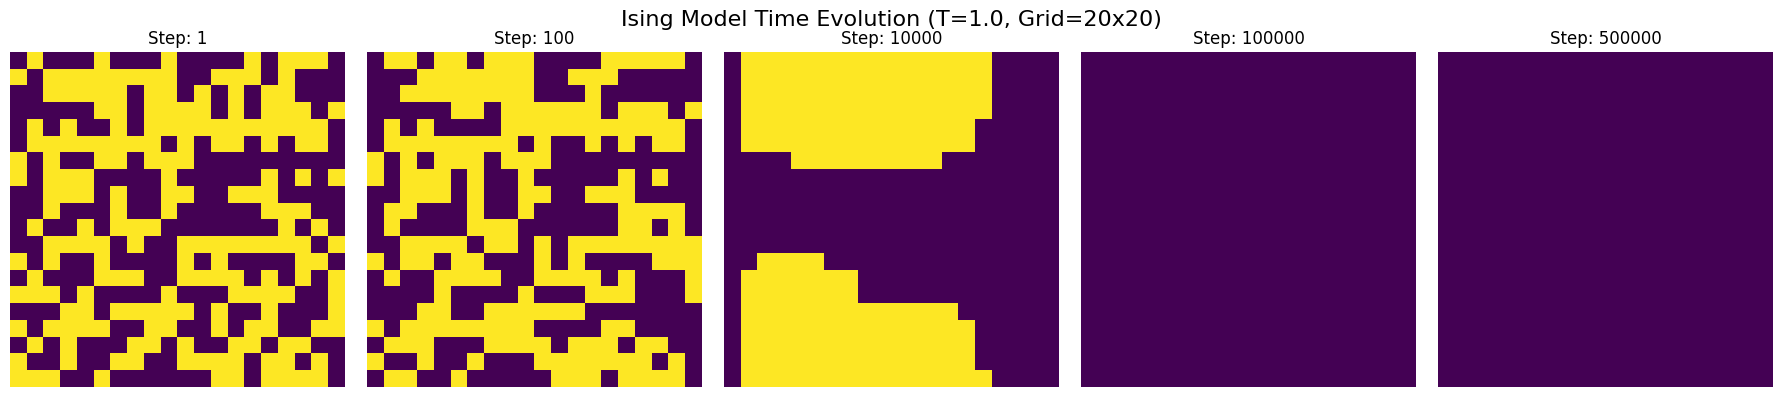

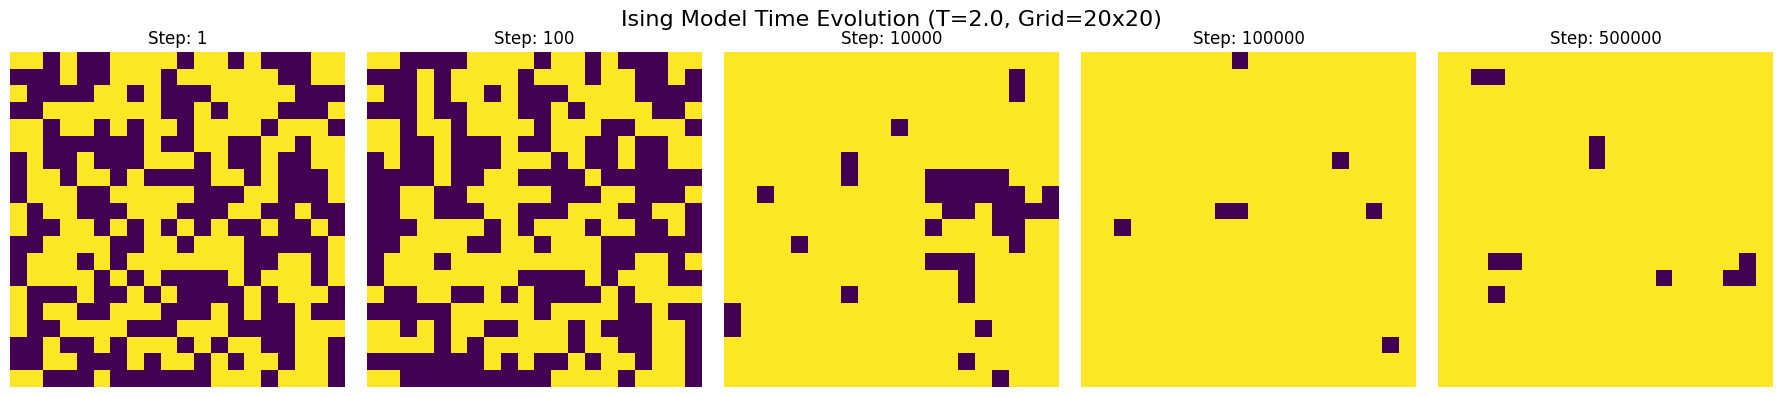

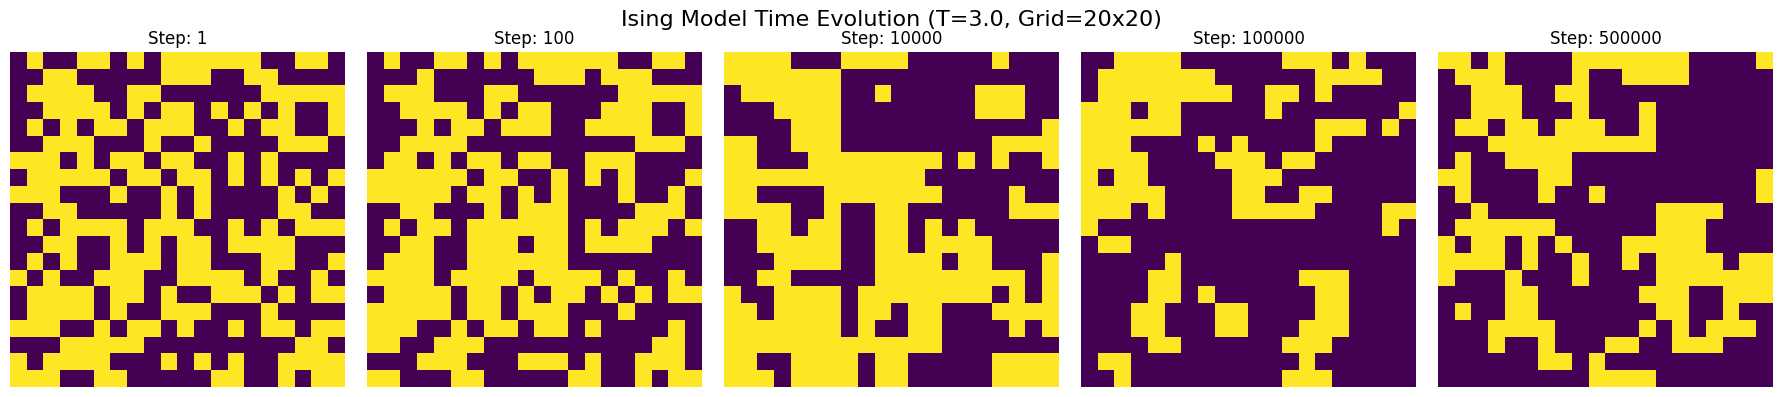

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def visualize_evolution(N=50, steps=200001, snapshot_steps={1, 10, 100, 1000, 10000, 200000}, T=1.0, J=1.0):
    """
    Simulates the 2D Ising model and plots snapshots at logarithmically
    spaced time intervals.
    """
    spins = np.random.choice([-1, 1], size=(N, N))
    
    snapshots = []
    
    for s in range(steps):
        if s in snapshot_steps:
            snapshots.append((s, spins.copy()))
            
        i, j = np.random.randint(0, N, size=2)
        
        neighbor_sum = (spins[(i-1)%N, j] + spins[(i+1)%N, j] + 
                        spins[i, (j-1)%N] + spins[i, (j+1)%N])
        
        delta_E = 2 * J * spins[i, j] * neighbor_sum
        
        if delta_E <= 0 or np.random.random() < np.exp(-delta_E / T):
            spins[i, j] *= -1
    
    fig, axes = plt.subplots(1, len(snapshot_steps), figsize=(18, 4))
    
    snapshots.sort(key=lambda x: x[0])
    
    for ax, (step, grid) in zip(axes, snapshots):
        ax.imshow(grid, cmap='viridis', interpolation='nearest')
        ax.set_title(f"Step: {step}")
        ax.axis('off')  # Hide axis ticks for cleaner look
        
    plt.suptitle(f"Ising Model Time Evolution (T={T}, Grid={N}x{N})", fontsize=16)
    plt.tight_layout()
    plt.show()

visualize_evolution(N=20, steps=500001, snapshot_steps={1, 100, 10000, 100000, 500000}, T=1.0)
visualize_evolution(N=20, steps=500001, snapshot_steps={1, 100, 10000, 100000, 500000}, T=2.0)
visualize_evolution(N=20, steps=500001, snapshot_steps={1, 100, 10000, 100000, 500000}, T=3.0)